In [1]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
# QALD9Plus-MT_de-babelscape_ner-mgenre_el-nllb_mt

In [19]:
df_kgqa = pd.read_csv("../data/Lingua Franca KGQA Experiments - mainTable.tsv", sep="\t")
df_neamt = pd.read_csv("../data/Lingua Franca NEAMT Evaluation (numerical placeholders) - MT Evaluation Results (All).tsv", sep="\t")

In [20]:
df_kgqa.head()

,Dataset,System,MicroF1,MacroF1,MicroPrecision,MacroPrecision,MicroRecall,MacroRecall,QALD-F1,Timestamp,ExperimentURI
0,qald_9_plus_train_dbpedia,NIFWS_Qanary_1(http://porque.cs.upb.de:40123/q...,0.015860,0.270551,0.016644,0.270489,0.015148,0.304283,0.454851,2022-09-27 11:58:31,http://gerbil-qa.aksw.org/gerbil/experiment?id...
1,qald_9_plus_train_dbpedia,NIFWS_Qanary_2(http://porque.cs.upb.de:40123/q...,0.000534,0.153233,0.001851,0.152801,0.000312,0.156863,0.270204,2022-09-27 11:58:35,http://gerbil-qa.aksw.org/gerbil/experiment?id...
2,qald_9_plus_train_dbpedia,NIFWS_Qanary_3(http://porque.cs.upb.de:40123/q...,0.015534,0.260033,0.015066,0.259709,0.016032,0.292298,0.440617,2022-09-27 13:58:45,http://gerbil-qa.aksw.org/gerbil/experiment?id...
3,qald_9_plus_train_dbpedia,NIFWS_Qanary_4(http://porque.cs.upb.de:40123/q...,0.018333,0.231852,0.028177,0.231040,0.013586,0.243279,0.388302,2022-09-27 14:50:57,http://gerbil-qa.aksw.org/gerbil/experiment?id...
4,qald_9_plus_test_dbpedia,NIFWS_Qanary_3(http://porque.cs.upb.de:40123/q...,0.004216,0.256712,0.004580,0.264491,0.003905,0.264943,0.409837,2022-09-27 16:04:06,http://gerbil-qa.aksw.org/gerbil/experiment?id...


In [21]:
join_column = []

for i, row in df_neamt.iterrows():
    pipeline = '-'.join(c for c in ast.literal_eval(row["Components"]))
    join_column.append(f"{row['Test Name']}_{row['Source Language']}-{pipeline}")

df_neamt["join_column"] = join_column

In [22]:
# inner join of two dataframes
joined = pd.merge(df_neamt, df_kgqa.rename(columns={'Dataset':'join_column'}), on='join_column',  how='inner')

In [23]:
joined = joined[['Test Name', 'Source Language', 'Components', 'BLEU', 'BLEU NLTK', 'METEOR', 'chrF++', 'TER', 'System_y', 'MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']]
joined.dropna(inplace=True)

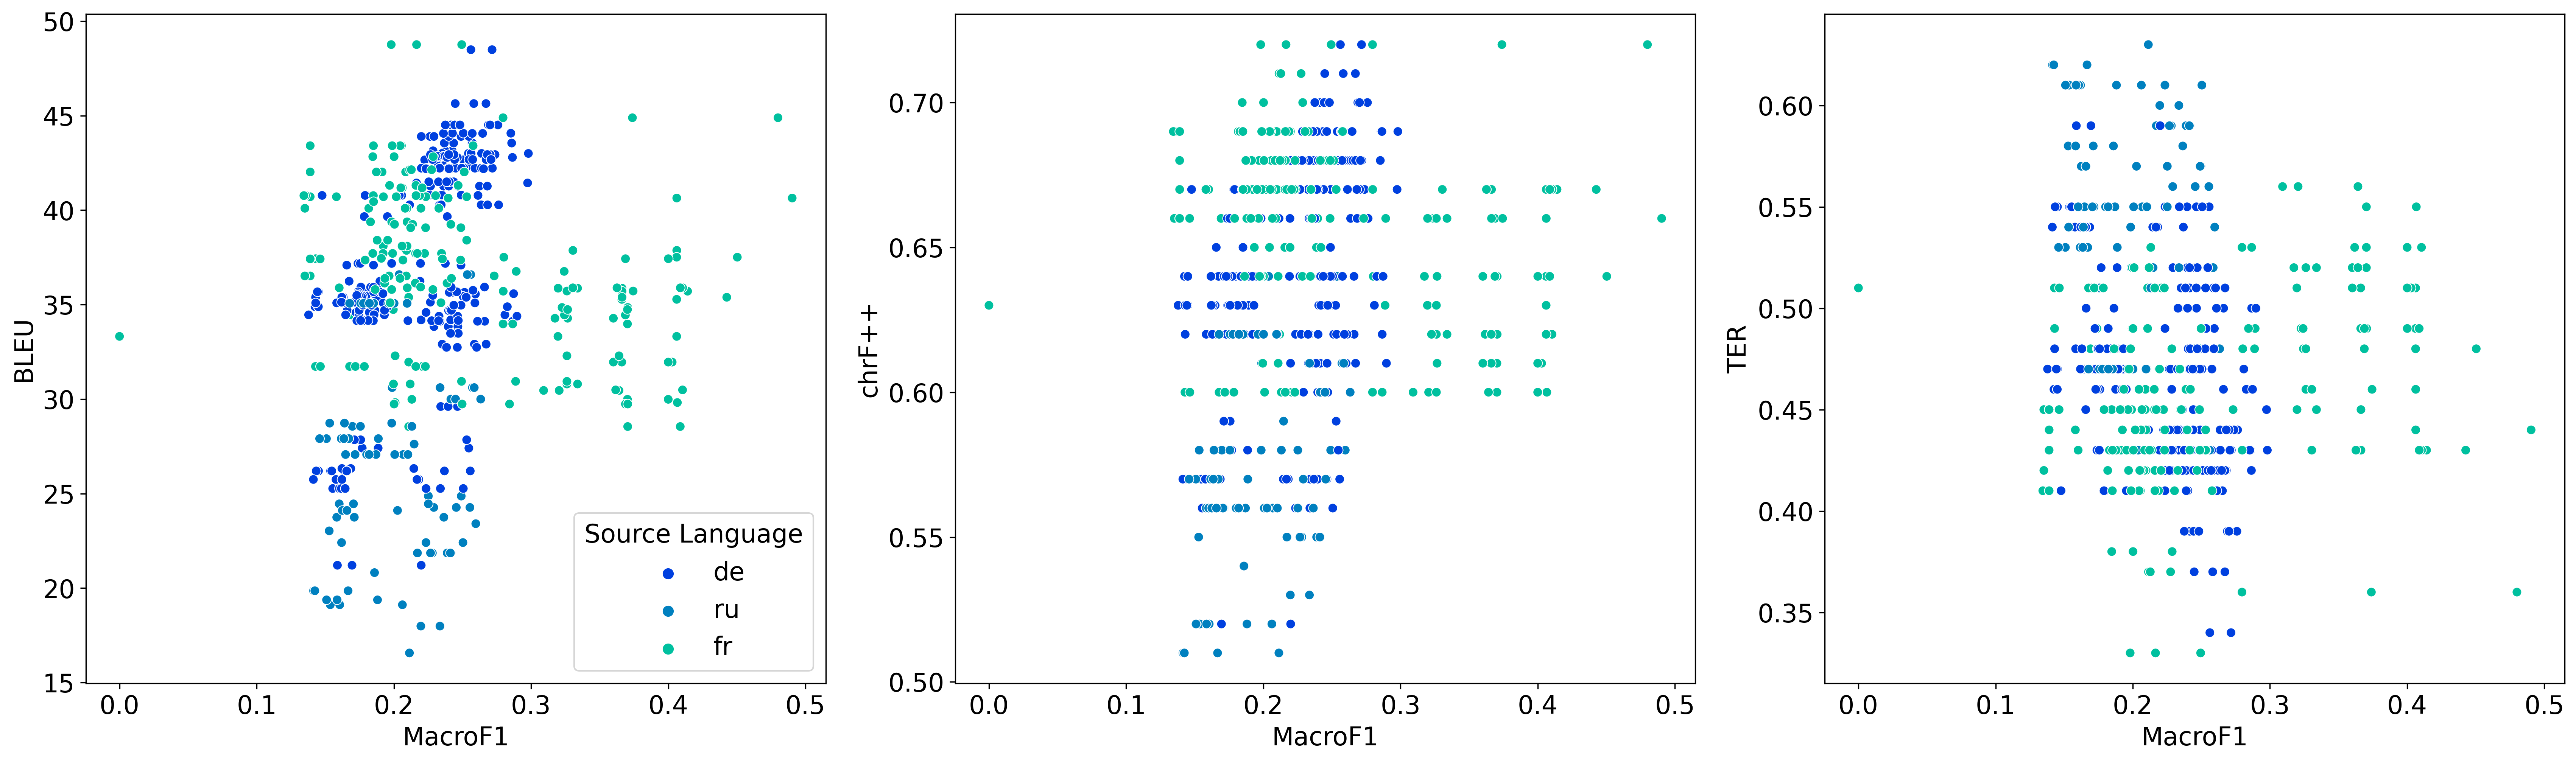

In [24]:
plt.rcParams['font.size'] = 16

metrics = ['BLEU', 'chrF++', 'TER', ]
fig, axs = plt.subplots(ncols=len(metrics), figsize=(23, 7), dpi=300)

for i, metric in enumerate(metrics):
    sns.scatterplot(data=joined, x="MacroF1", y=metric, hue="Source Language", ax=axs[i], palette='winter')
    # axs[i].set_xticklabels(['NEAMT', 'Standard MT'])
    # axs[i].set_xlabel("")
    if i != 0:
        axs[i].legend().remove()

plt.tight_layout()
# plt.savefig('../data/img/strip-plot-all.pdf')

In [28]:
corr = joined[['BLEU', 'chrF++', 'TER', 'MicroF1', 'MacroF1', 'MicroPrecision', 'MacroPrecision', 'MicroRecall', 'MacroRecall', 'QALD-F1']].corr()

In [29]:
corr

,BLEU,chrF++,TER,MicroF1,MacroF1,MicroPrecision,MacroPrecision,MicroRecall,MacroRecall,QALD-F1
BLEU,1.000000,0.953223,-0.942084,0.060848,0.141155,0.066884,0.133126,0.009878,0.089210,0.116844
chrF++,0.953223,1.000000,-0.960881,0.059344,0.195451,0.074570,0.186506,0.067613,0.154306,0.161113
TER,-0.942084,-0.960881,1.000000,-0.037081,-0.102201,-0.070562,-0.093794,-0.007979,-0.071280,-0.087696
MicroF1,0.060848,0.059344,-0.037081,1.000000,0.173939,0.448488,0.150124,0.834692,0.224755,-0.150178
MacroF1,0.141155,0.195451,-0.102201,0.173939,1.000000,0.229454,0.994810,0.311858,0.960927,0.890991
MicroPrecision,0.066884,0.074570,-0.070562,0.448488,0.229454,1.000000,0.201233,0.301591,0.196003,0.046762
MacroPrecision,0.133126,0.186506,-0.093794,0.150124,0.994810,0.201233,1.000000,0.291260,0.954106,0.893345
MicroRecall,0.009878,0.067613,-0.007979,0.834692,0.311858,0.301591,0.291260,1.000000,0.385449,0.009866
MacroRecall,0.089210,0.154306,-0.071280,0.224755,0.960927,0.196003,0.954106,0.385449,1.000000,0.887392
QALD-F1,0.116844,0.161113,-0.087696,-0.150178,0.890991,0.046762,0.893345,0.009866,0.887392,1.000000


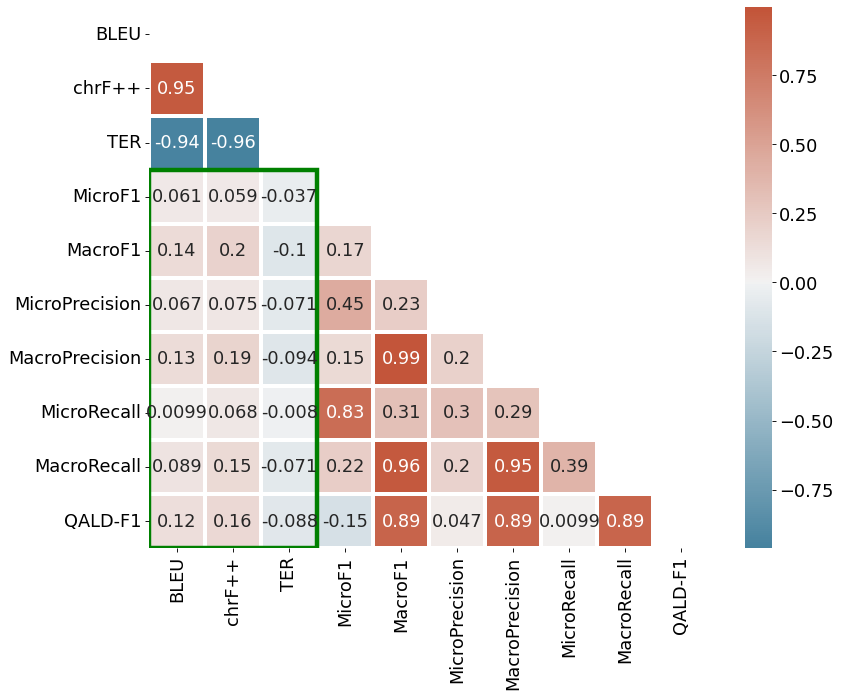

In [31]:
plt.rcParams['font.size'] = 16
f, ax = plt.subplots(figsize=(11, 9), dpi=80)

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, mask=mask, center=0, linewidths=3.5, fmt='%.3f', ax=ax)

rect = patches.Rectangle((0, 3), 3, 7, linewidth=4, edgecolor='g', facecolor='none',)
ax.add_patch(rect)

plt.tight_layout()
plt.savefig('../data/img/mt-kgqa-heatmap.pdf')